In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

datas = pd.read_csv('/content/train.csv')
datas.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [ ]:
datas.shape, datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


((8523, 12), None)

In [ ]:
datas.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# Handling missing value

Numeric column (Item_Weight) →fill with Mean/Median

Categorical column (Outlet_Size) →fill with Mode

In [ ]:
datas['Item_Weight'].fillna(datas['Item_Weight'].mean(), inplace=True)
print(datas.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


/tmp/ipython-input-3033799553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datas['Item_Weight'].fillna(datas['Item_Weight'].mean(), inplace=True)


In [ ]:
mode_of_outlet_size=datas.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])
#print(mode_of_outlet_size)

mode_of_outlet_size_to_dict = mode_of_outlet_size.to_dict()
#print(mode_of_outlet_size_to_dict)

missing_values = data['Outlet_Size'].isnull()
#print(missing_values)

datas.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].map(mode_of_outlet_size_to_dict)
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


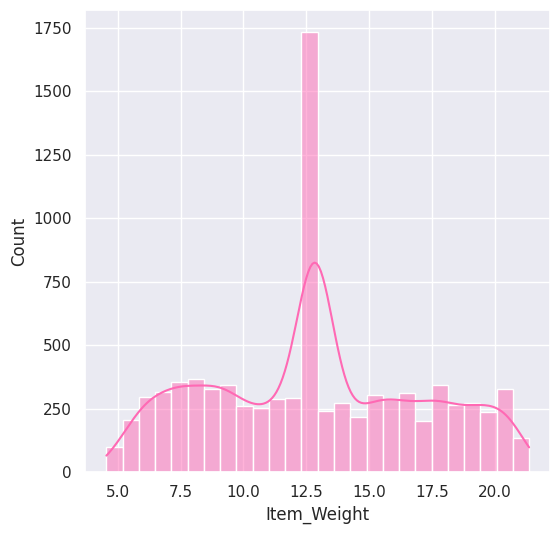

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(datas['Item_Weight'], kde=True, color='hotpink')
plt.show()

/tmp/ipython-input-1846091295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=datas, palette='Set1') #countplot = bar


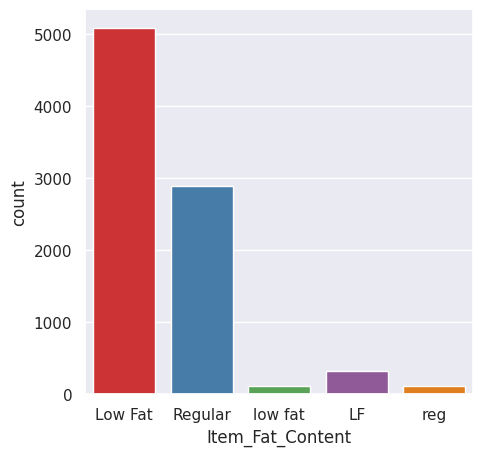

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=datas, palette='Set1') #countplot = bar
plt.show()

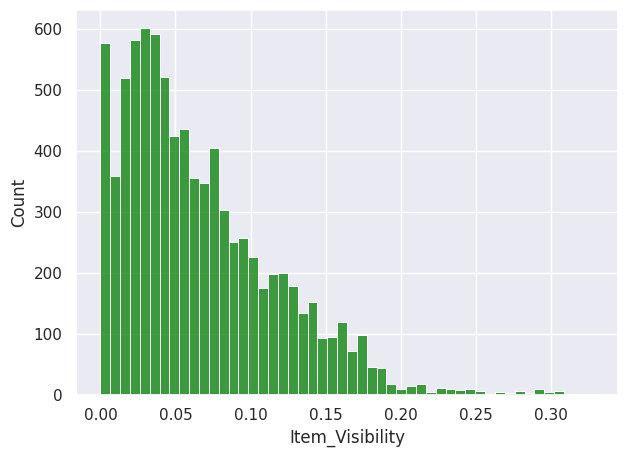

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data['Item_Visibility'], color='green')
plt.show()

/tmp/ipython-input-3351276416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=datas, palette='Set2')


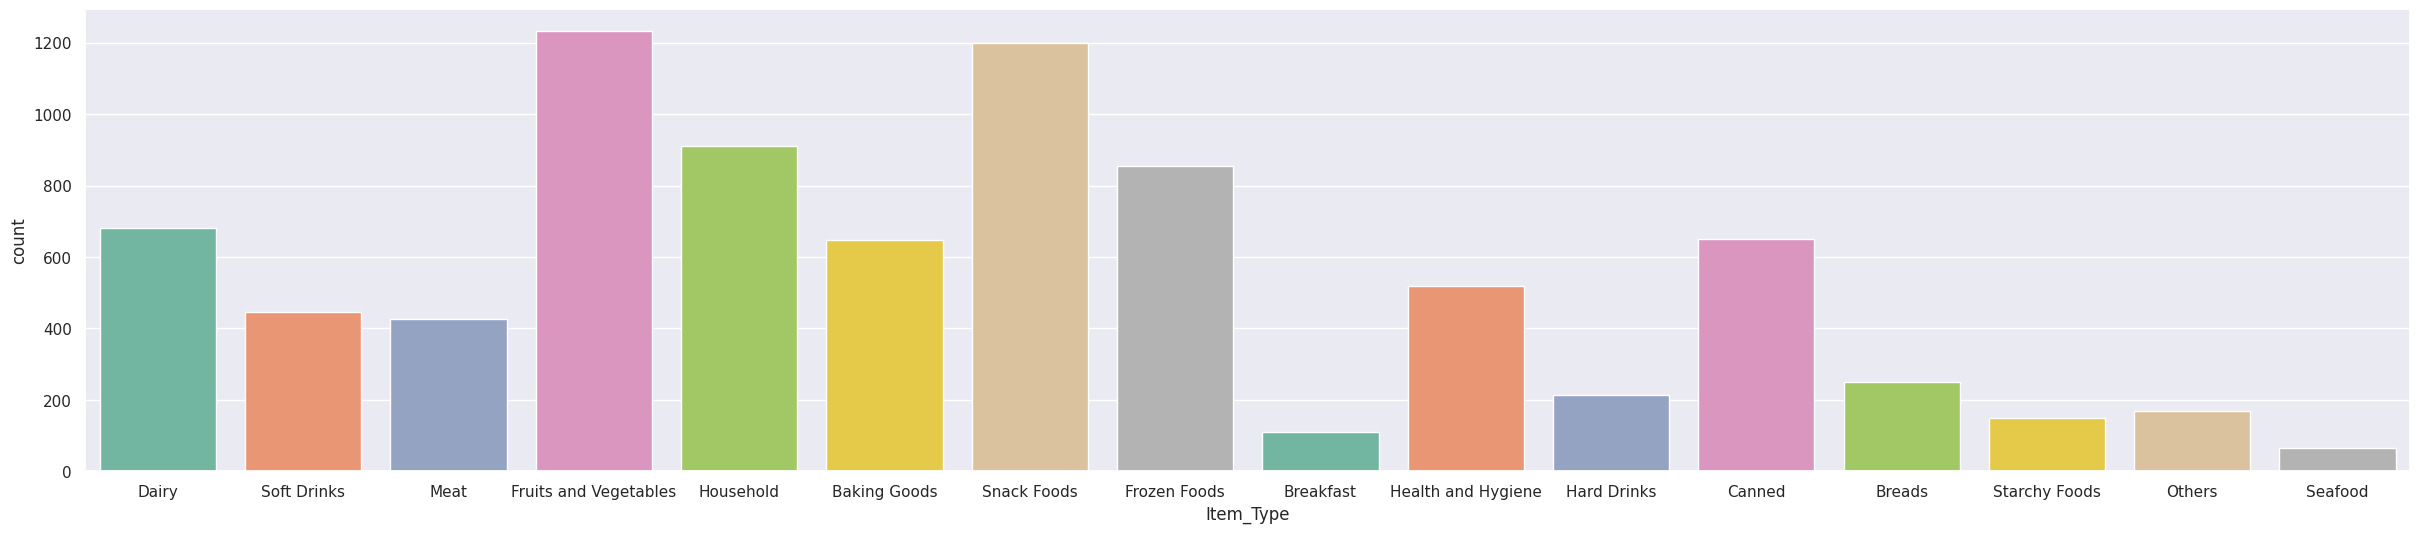

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=datas, palette='Set2')
plt.show()

# Data Cleaning

In [ ]:
# Clean Item_Fat_Content
datas.replace({'Item_Fat_Content': {'LF':'Low Fat', 'reg':'Regular', 'low fat':'low Fat'}}, inplace=True)

# Encoding Categorical data

In [ ]:
encoder = LabelEncoder()
for col in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  datas[col]=encoder.fit_transform(datas[col])
datas.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,1357,10.60,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.21,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976
8522,50,14.80,0,0.044878,14,75.4670,8,1997,2,0,1,765.6700


In [ ]:
#Split features and target
X = big_mart_data.drop('Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#Define model with tuned parameters
model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1
)

In [ ]:
# Cross-validation
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print("Cross-validation R2 scores:", scores)
print("Mean R2:", scores.mean())

#Train model
model.fit(X_train, Y_train)

# Evaluate model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = metrics.r2_score(Y_train, y_train_pred)
r2_test = metrics.r2_score(Y_test, y_test_pred)

print("Training R2:", r2_train)
print("Test R2:", r2_test)


Cross-validation R2 scores: [0.56411607 0.53066981 0.50306329 0.53844727 0.56485944]
Mean R2: 0.5402311771835955
Training R2: 0.8324444035648672
Test R2: 0.5444217154347794
